
First, I'll import the pandas library. Then, I'll load the 'wine.csv' dataset into a pandas DataFrame named `df` and display the first five rows to verify the data has been loaded correctly.



In [1]:
import pandas as pd
df = pd.read_csv('wine.csv')
print("DataFrame 'df' loaded successfully. Displaying the first 5 rows:")
df.head()

DataFrame 'df' loaded successfully. Displaying the first 5 rows:


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Basic Data Exploration

Perform initial data exploration by displaying the first few rows, checking data types, reviewing descriptive statistics, and identifying any missing values in the dataset.



To perform the requested data exploration steps, I will display the first few rows, check data types and non-null counts using .info(), generate descriptive statistics with .describe(), and identify missing values using .isnull().sum().



In [2]:
print("Displaying the first 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

Displaying the first 5 rows of the DataFrame:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 t

## Feature Distribution Visualization

Generate histograms or density plots for each numerical feature to visualize their distributions. Additionally, create box plots to identify potential outliers and understand the spread of the data. Ensure all plots include appropriate titles and legends.



To visualize the distributions and identify outliers of numerical features, I will import `matplotlib.pyplot` and `seaborn`, then iterate through numerical columns (excluding 'Type') to create histograms and box plots, ensuring appropriate titles and display.



Generating distribution plots for the following numerical columns: ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']


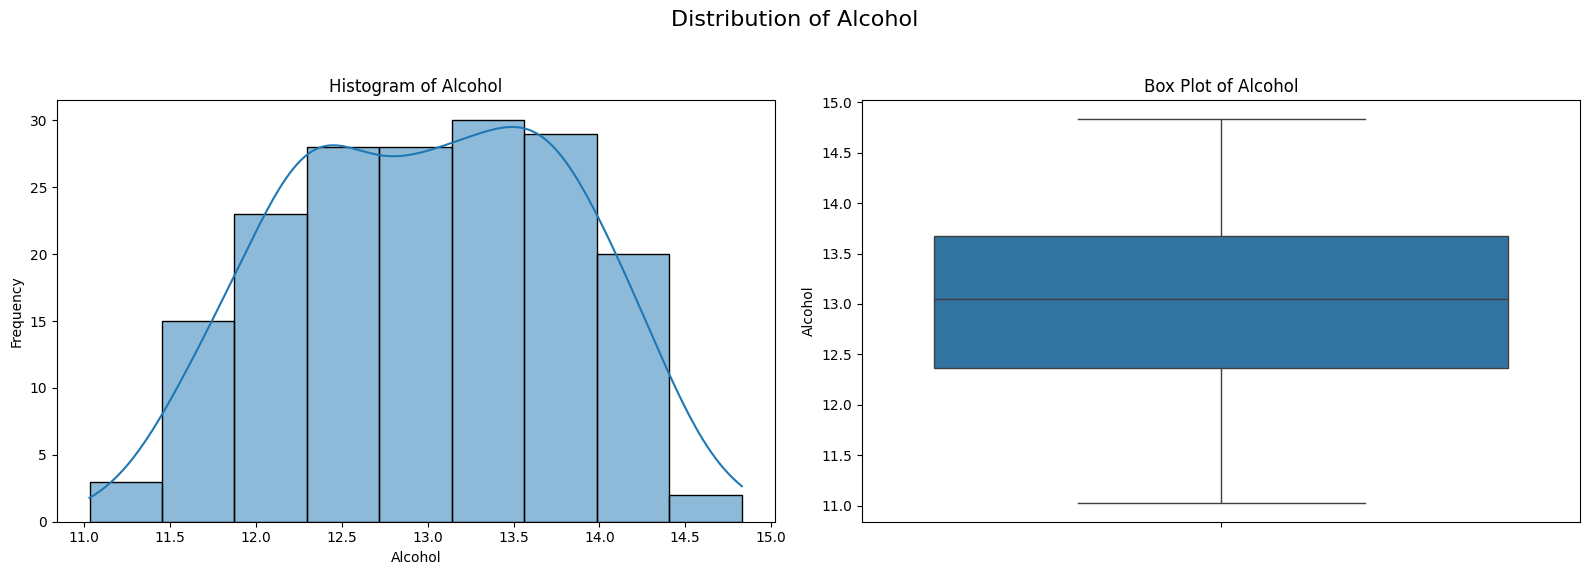

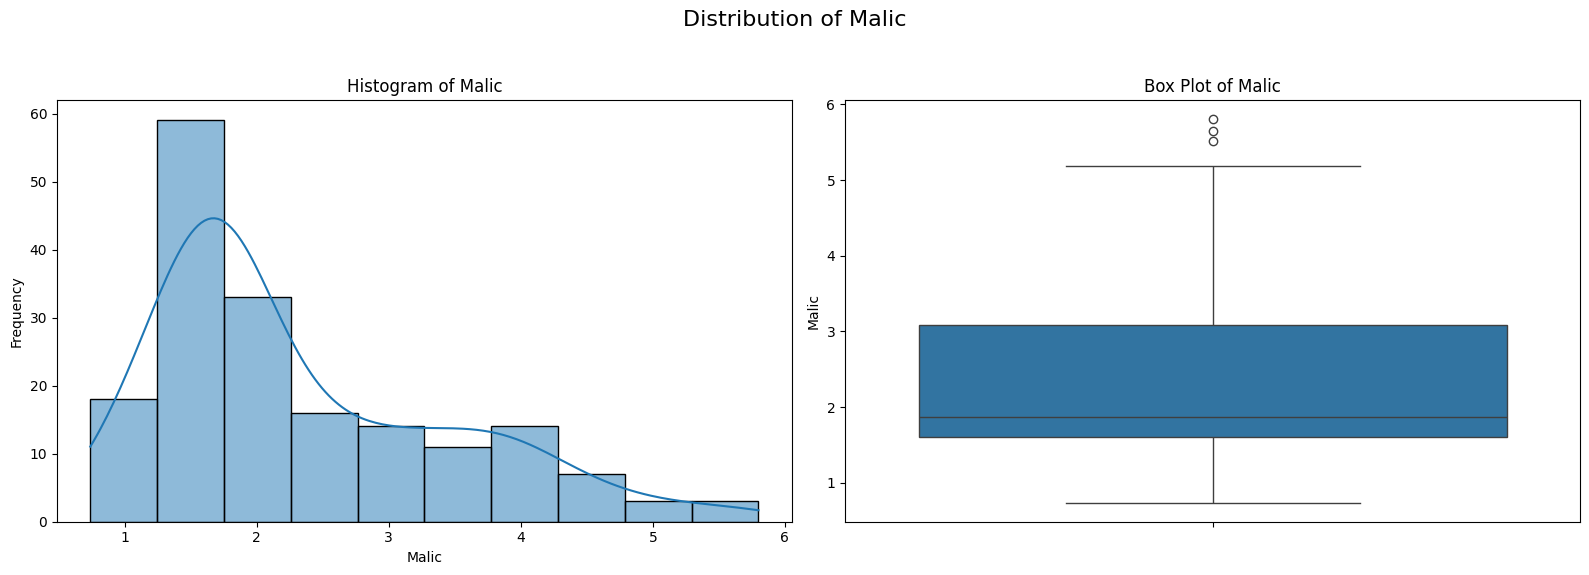

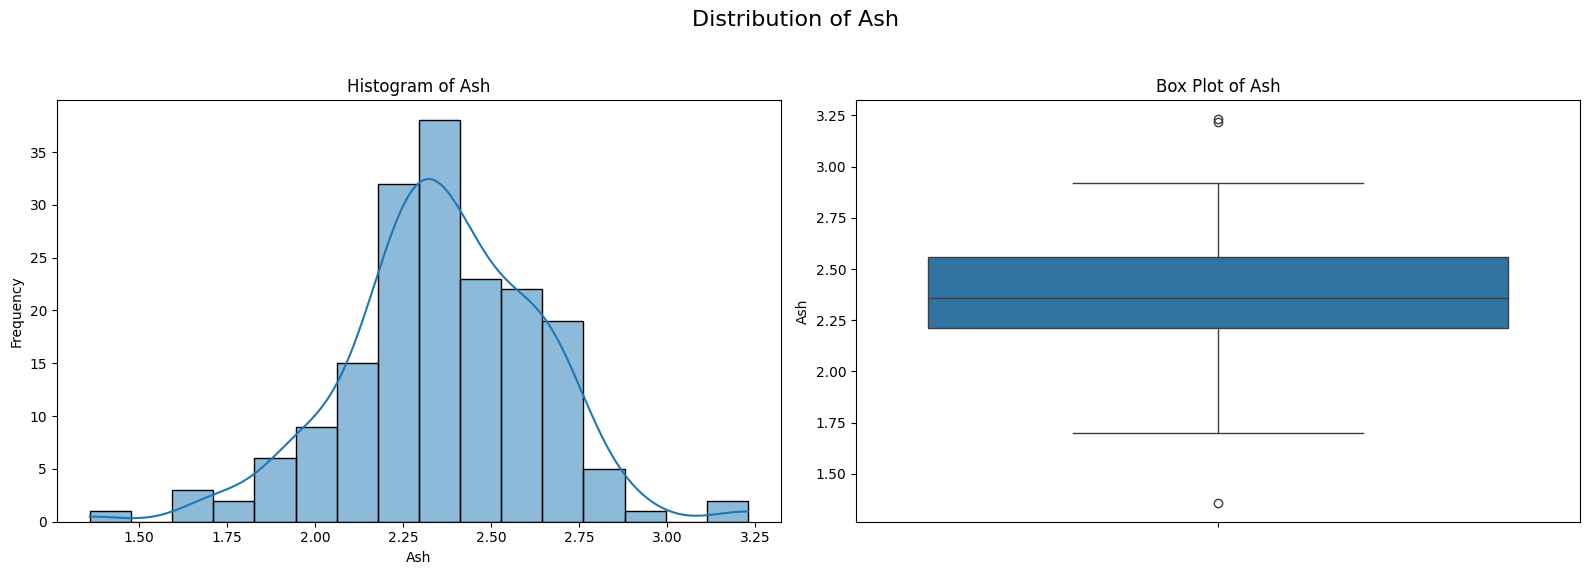

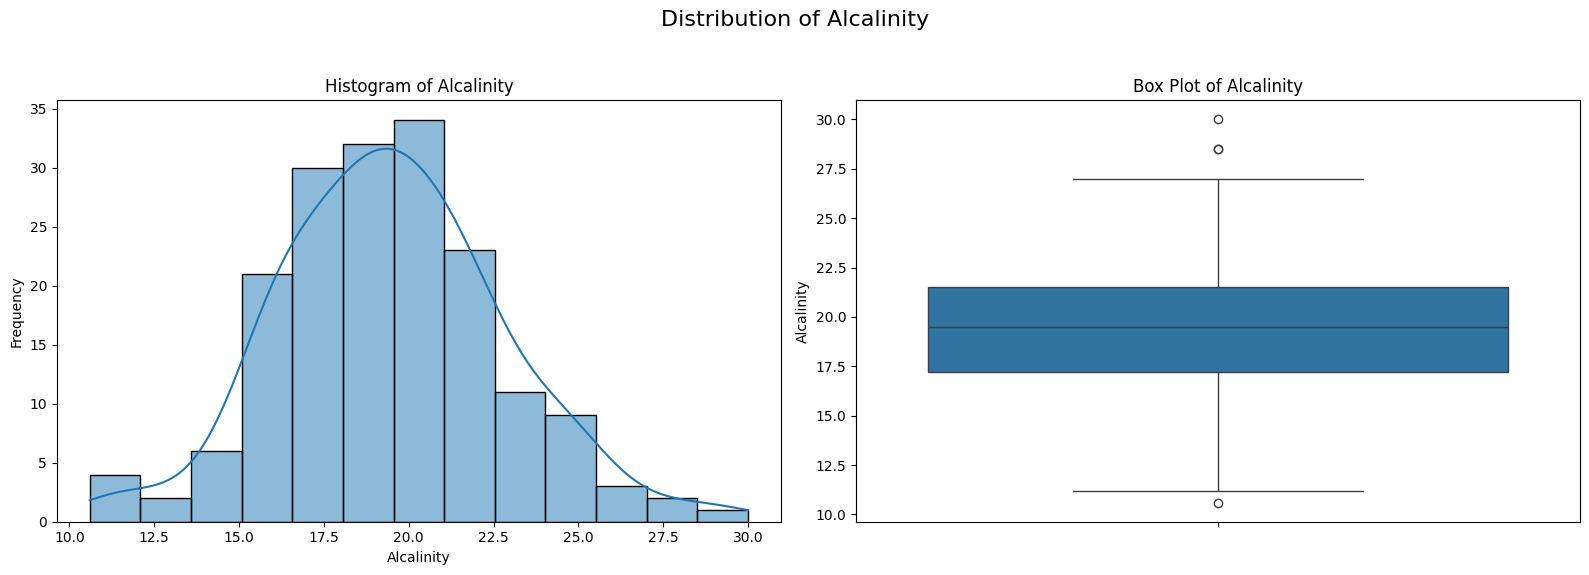

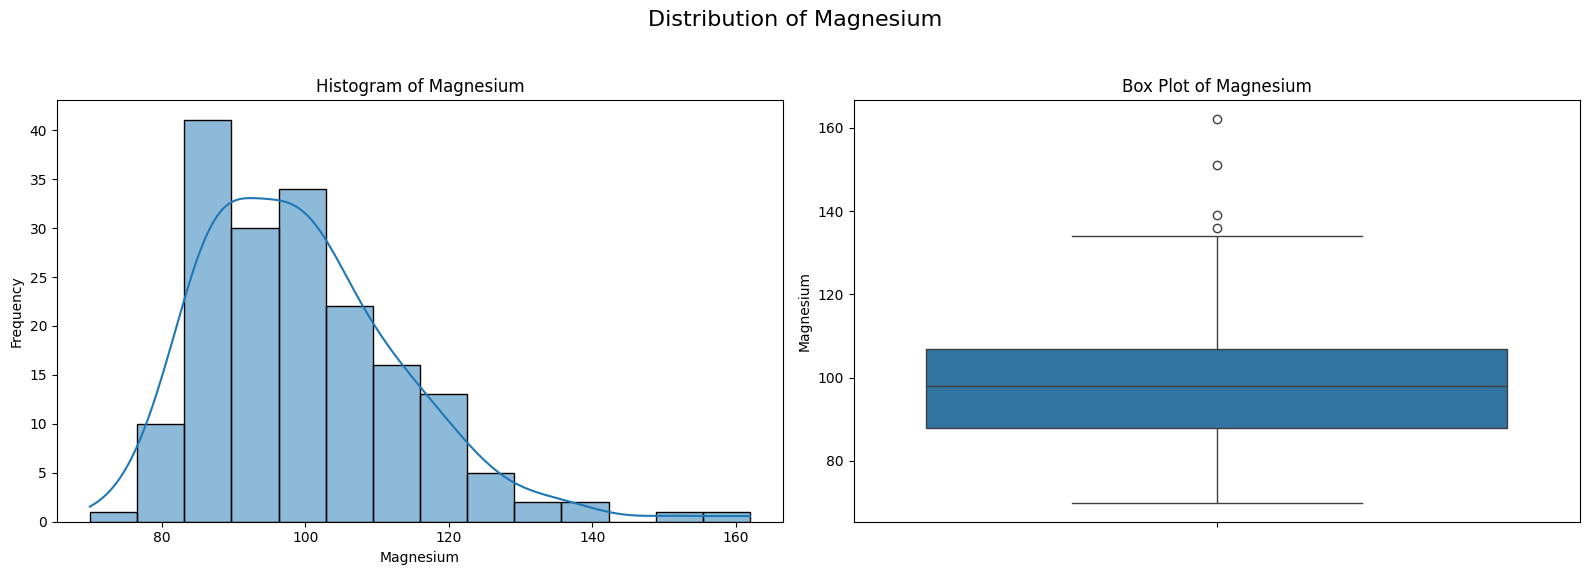

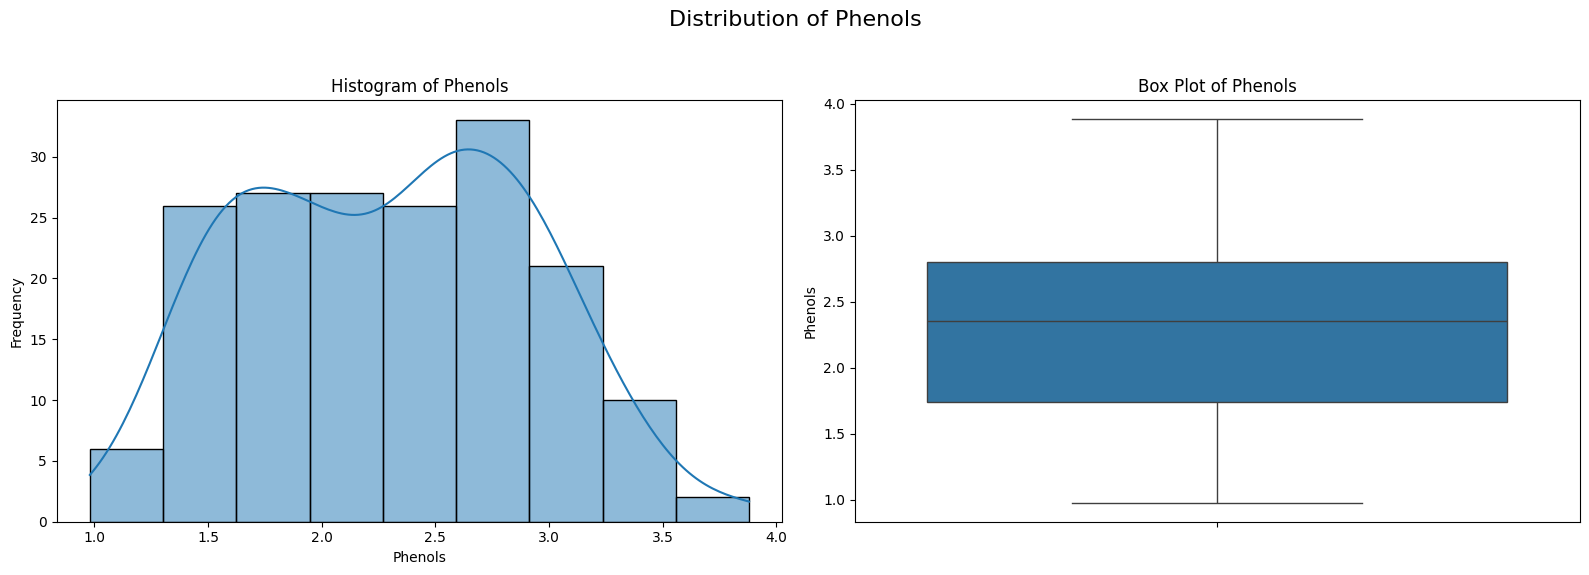

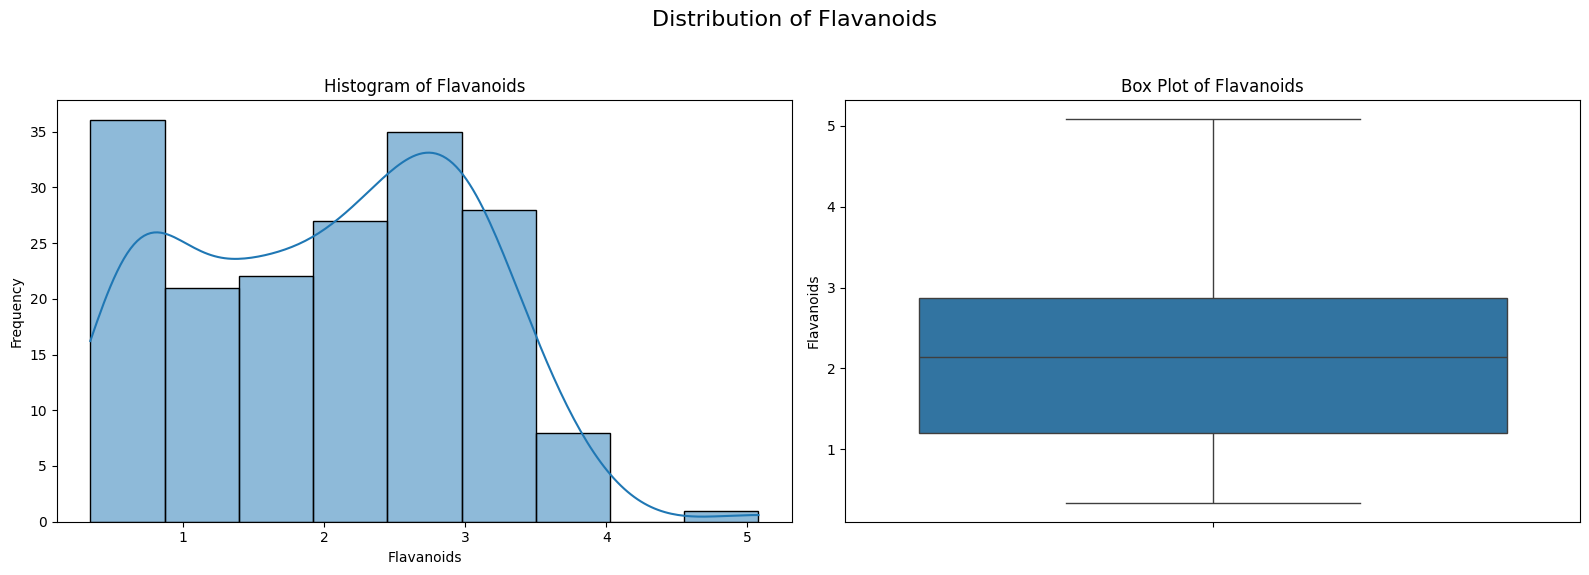

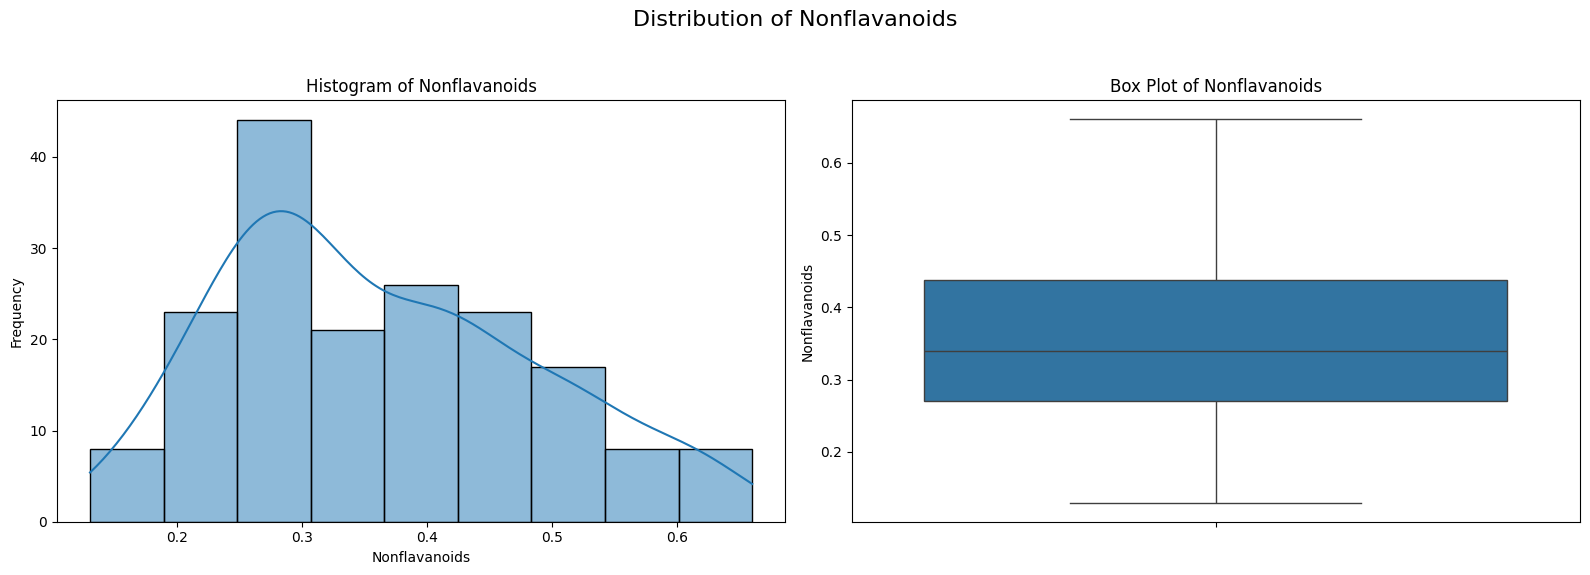

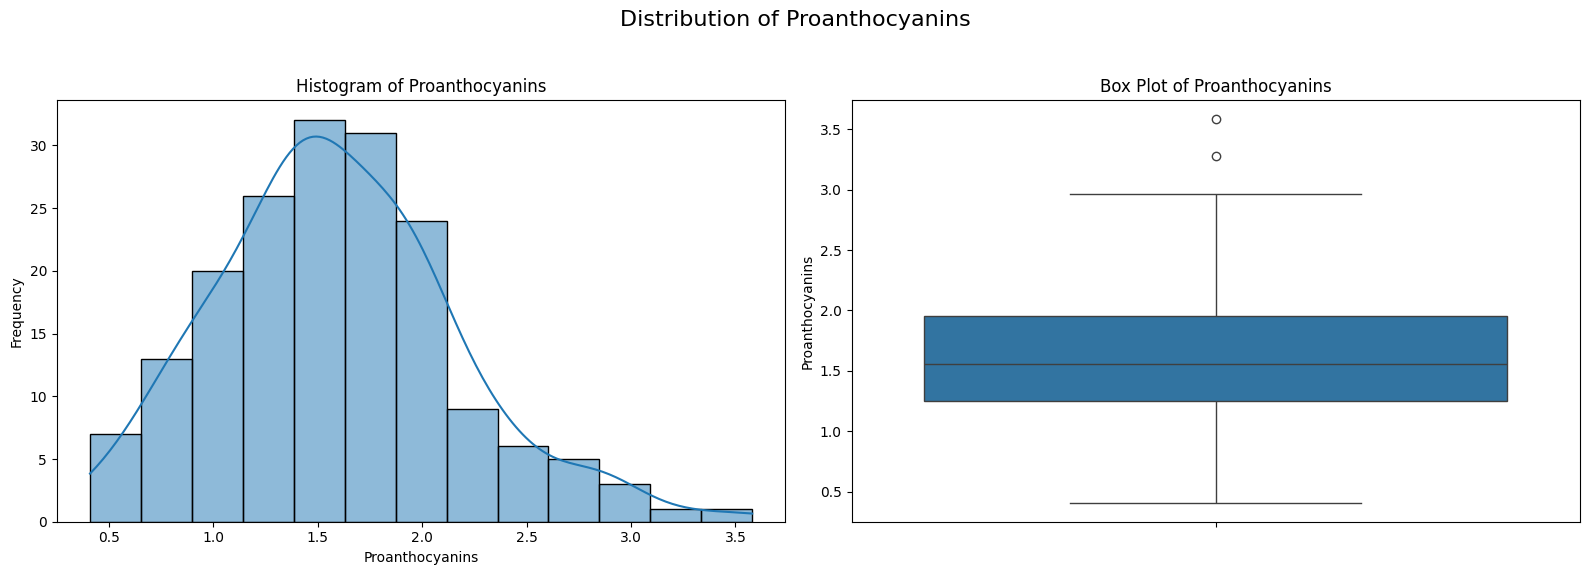

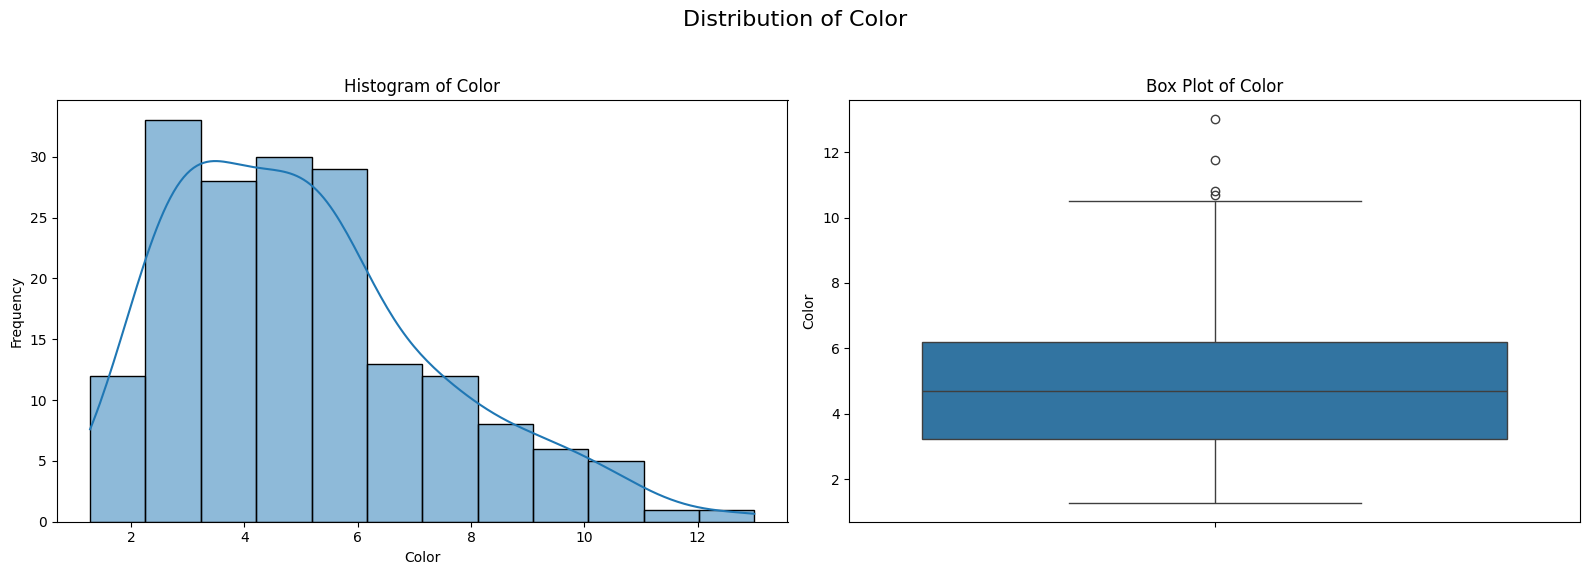

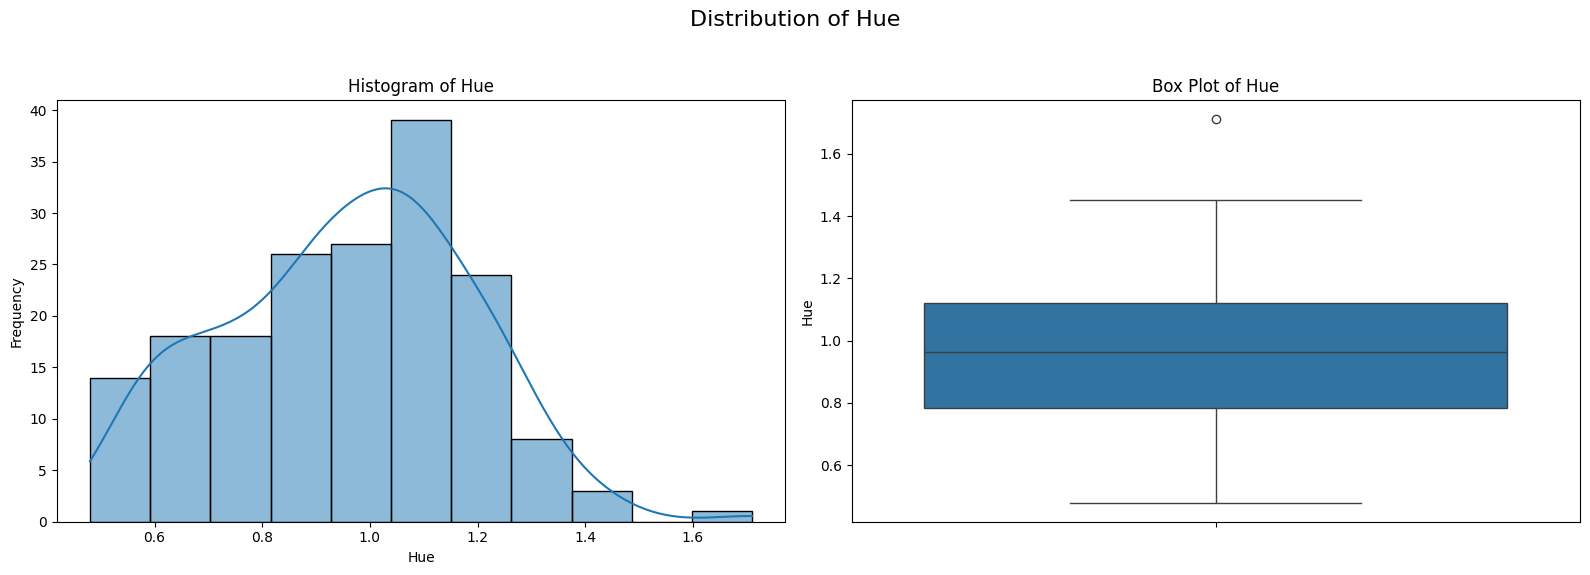

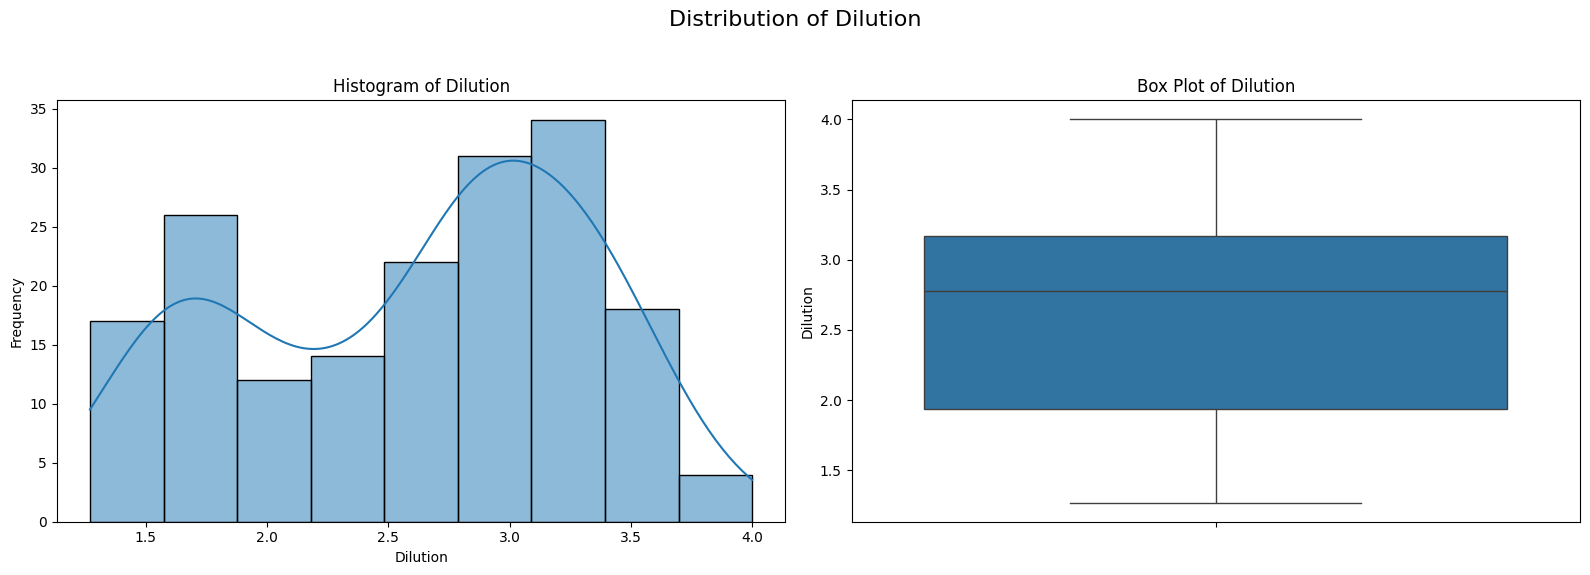

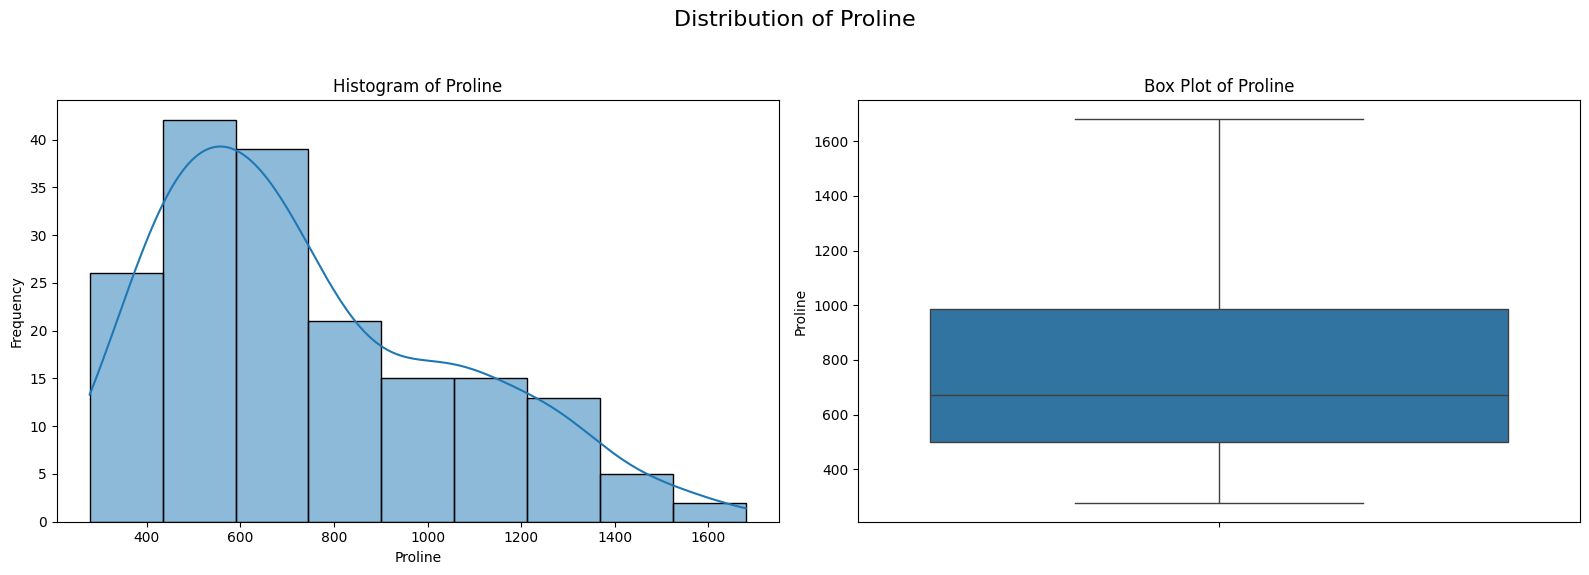

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns, excluding 'Type'
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
if 'Type' in numerical_cols:
    numerical_cols.remove('Type')

print(f"Generating distribution plots for the following numerical columns: {numerical_cols}")

for col in numerical_cols:
    # Create a figure with two subplots for histogram and box plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Distribution of {col}', fontsize=16)

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(y=df[col], ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_ylabel(col)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

## Correlation Analysis
Compute the correlation matrix between all features in the dataset. Visualize this matrix using a heatmap to understand the linear relationships and identify highly correlated features. The heatmap should have a color bar and clear labels.



To perform correlation analysis as requested, I will compute the correlation matrix of the DataFrame `df` and visualize it using a heatmap with annotations, a divergent colormap, and a descriptive title.



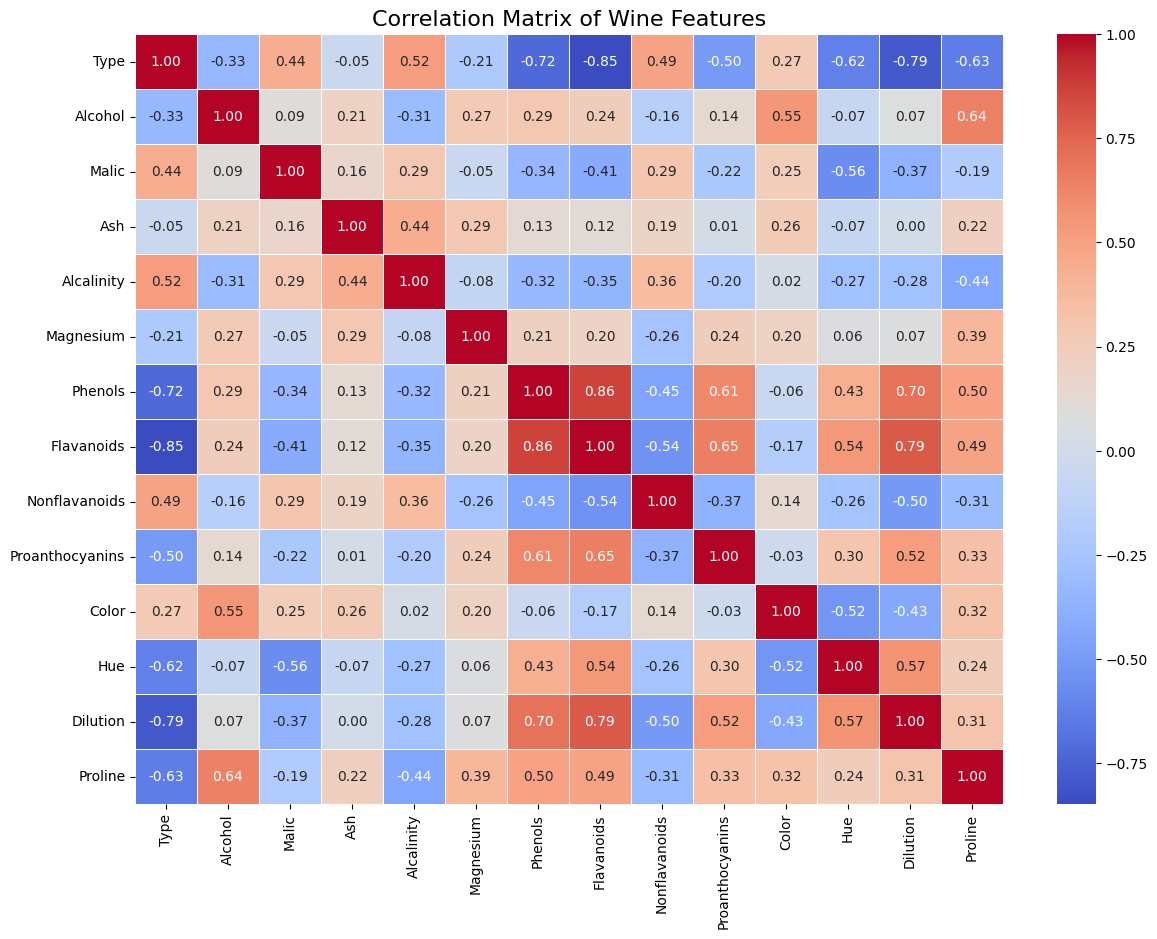

In [4]:
correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Wine Features', fontsize=16)
plt.show()

## Standardize Features for PCA


Standardize the numerical features of the dataset so that they have a mean of 0 and a standard deviation of 1. This is a crucial preprocessing step for PCA to ensure all features contribute equally to the variance.



I will import the `StandardScaler` from `sklearn.preprocessing`, create a feature DataFrame by dropping the 'Type' column from the original `df`, instantiate `StandardScaler`, and then fit and transform the data, storing the scaled data in `df_scaled`.



In [5]:
from sklearn.preprocessing import StandardScaler

# Create a new DataFrame by dropping the 'Type' column
df_features = df.drop('Type', axis=1)

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the features
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

print("Features standardized successfully. Displaying the first 5 rows of df_scaled:")
print(df_scaled.head())

Features standardized successfully. Displaying the first 5 rows of df_scaled:
    Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997    1.034819   
1  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648    0.733629   
2  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997    1.215533   
3  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446    1.466525   
4  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997    0.663351   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  
0      -0.659563         1.224884  0.251717  0.362177  1.847920  1.013009  
1      -0.820719        -0.544721 -0.293321  0.406051  1.113449  0.965242  
2      -0.498407         2.135968  0.269020  0.318304  0.788587  1.395148  
3      -0.981875         1.032155  1.186068 -0.427544  1.184071  2.334574  
4       0.226796         0.401404 -0.319276  0.362177  0.4496

## Implement PCA and Determine Optimal Component
Apply Principal Component Analysis (PCA) to the standardized dataset. Generate a scree plot or a cumulative explained variance plot to help determine the optimal number of principal components to retain. The plot should clearly show the variance explained by each component and the cumulative variance.



To perform PCA and visualize the explained variance, I will import the PCA class, fit it to the scaled data, calculate individual and cumulative explained variance ratios, and then plot both to help determine the optimal number of components.



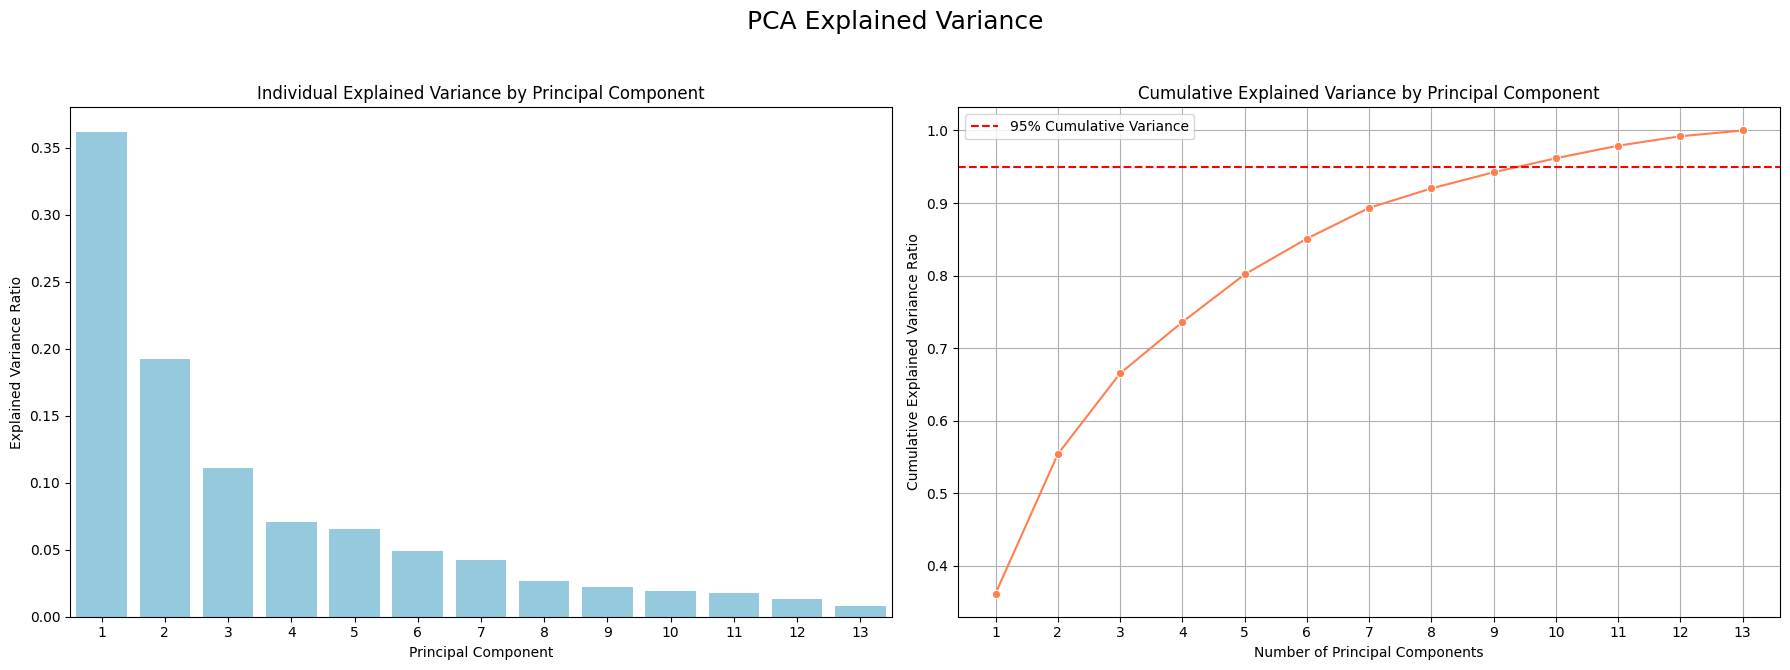

Explained Variance Ratios:
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193
PC11: 0.0174
PC12: 0.0130
PC13: 0.0080

Cumulative Explained Variance:
Up to PC1: 0.3620
Up to PC2: 0.5541
Up to PC3: 0.6653
Up to PC4: 0.7360
Up to PC5: 0.8016
Up to PC6: 0.8510
Up to PC7: 0.8934
Up to PC8: 0.9202
Up to PC9: 0.9424
Up to PC10: 0.9617
Up to PC11: 0.9791
Up to PC12: 0.9920
Up to PC13: 1.0000


In [6]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate PCA without specifying n_components
pca = PCA(n_components=None)

# Fit PCA to the scaled data
pca.fit(df_scaled)

# Calculate explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('PCA Explained Variance', fontsize=18)

# Plot individual explained variance (Scree plot)
sns.barplot(x=list(range(1, len(explained_variance_ratio) + 1)), y=explained_variance_ratio, ax=axes[0], color='skyblue')
axes[0].set_title('Individual Explained Variance by Principal Component')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_xticks(range(0, len(explained_variance_ratio)))
axes[0].set_xticklabels(range(1, len(explained_variance_ratio) + 1))

# Plot cumulative explained variance
sns.lineplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=cumulative_explained_variance, ax=axes[1], marker='o', color='coral')
axes[1].set_title('Cumulative Explained Variance by Principal Component')
axes[1].set_xlabel('Number of Principal Components')
axes[1].set_ylabel('Cumulative Explained Variance Ratio')
axes[1].set_xticks(range(1, len(cumulative_explained_variance) + 1))
axes[1].set_xticklabels(range(1, len(cumulative_explained_variance) + 1))
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Cumulative Variance')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Explained Variance Ratios:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

print("\nCumulative Explained Variance:")
for i, cum_ratio in enumerate(cumulative_explained_variance):
    print(f"Up to PC{i+1}: {cum_ratio:.4f}")

## Transform Data with PCA


Transform the standardized dataset into the chosen optimal number of principal components. Store this PCA-transformed data for subsequent clustering analysis.



I will instantiate a PCA object with 10 components, apply it to the scaled data, convert the result to a DataFrame with appropriate column names, and then display its head to verify the transformation.



In [7]:
from sklearn.decomposition import PCA
import pandas as pd

# Instantiate PCA with n_components=10 (as 10 components explain over 95% of the variance)
pca = PCA(n_components=10)

# Apply PCA to the scaled data
df_pca = pca.fit_transform(df_scaled)

# Convert the resulting NumPy array into a pandas DataFrame
pca_columns = [f'PC{i+1}' for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(data=df_pca, columns=pca_columns)

print("PCA transformed data successfully. Displaying the first 5 rows of df_pca:")
print(df_pca.head())

PCA transformed data successfully. Displaying the first 5 rows of df_pca:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10  
0 -0.065139 -0.641443  1.020956  
1 -1.024416  0.308847  0.159701  
2  0.344216  1.177834  0.113361  
3 -0.643593 -0.052544  0.239413  
4 -0.416700 -0.326819 -0.078366  


## Clustering with Original Data


Apply a clustering algorithm (K-Means) to the original standardized dataset and determine an appropriate number of clusters using the elbow method.



I will perform the elbow method to determine the optimal number of clusters for K-Means. This involves iterating through a range of cluster numbers, fitting a KMeans model, collecting inertia values, and then plotting these values to identify the 'elbow' point. This step also involves importing necessary libraries like KMeans and matplotlib.



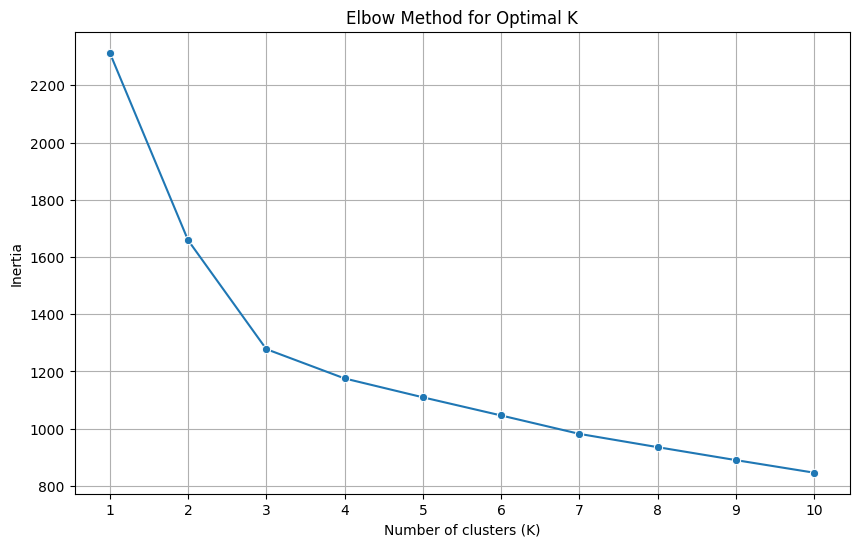

Elbow method plot generated successfully.


In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize an empty list to store inertia values
inertia_values = []

# Define a range of possible cluster numbers to test
k_range = range(1, 11) # Testing from 1 to 10 clusters

# Iterate through the range of k values
for k in k_range:
    # Initialize KMeans model with current k and random_state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to suppress warning
    # Fit the KMeans model to the scaled data
    kmeans.fit(df_scaled)
    # Append the inertia (sum of squared distances of samples to their closest cluster center) to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(k_range), y=inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(list(k_range))
plt.grid(True)
plt.show()

print("Elbow method plot generated successfully.")



```
# This is formatted as code
```


Based on the elbow plot generated previously, the optimal number of clusters appears to be 3. I will now apply K-Means with 3 clusters to the `df_scaled` data, assign the cluster labels, and then calculate the silhouette score to evaluate the clustering quality.



In [9]:
from sklearn.metrics import silhouette_score

# Based on the elbow plot, let's choose 3 as the optimal number of clusters
optimal_k = 3

# Instantiate KMeans with the chosen optimal number of clusters
kmeans_model_original = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the KMeans model to the scaled data
kmeans_model_original.fit(df_scaled)

# Assign the resulting cluster labels to a new column in df_scaled
df_scaled['cluster_original'] = kmeans_model_original.labels_

print(f"K-Means clustering applied with {optimal_k} clusters. Displaying the first 5 rows of df_scaled with new 'cluster_original' column:")
print(df_scaled.head())

# Calculate and print the silhouette score
sil_score_original = silhouette_score(df_scaled.drop('cluster_original', axis=1), df_scaled['cluster_original'])
print(f"\nSilhouette Score for original standardized data with {optimal_k} clusters: {sil_score_original:.4f}")

K-Means clustering applied with 3 clusters. Displaying the first 5 rows of df_scaled with new 'cluster_original' column:
    Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997    1.034819   
1  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648    0.733629   
2  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997    1.215533   
3  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446    1.466525   
4  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997    0.663351   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  \
0      -0.659563         1.224884  0.251717  0.362177  1.847920  1.013009   
1      -0.820719        -0.544721 -0.293321  0.406051  1.113449  0.965242   
2      -0.498407         2.135968  0.269020  0.318304  0.788587  1.395148   
3      -0.981875         1.032155  1.186068 -0.427544  1.184071  2.334574   
4       0.226

## Visualize Original Data Clustering

Visualize the clustering results from the original standardized data using appropriate plots, such as scatter plots of two or three prominent original features, with data points colored according to their assigned cluster. Ensure the plot includes a legend for cluster labels.



To visualize the clustering results on the original standardized data, I will create a scatter plot using 'Alcohol' and 'Malic' as features and color the points by the assigned 'cluster_original' labels.



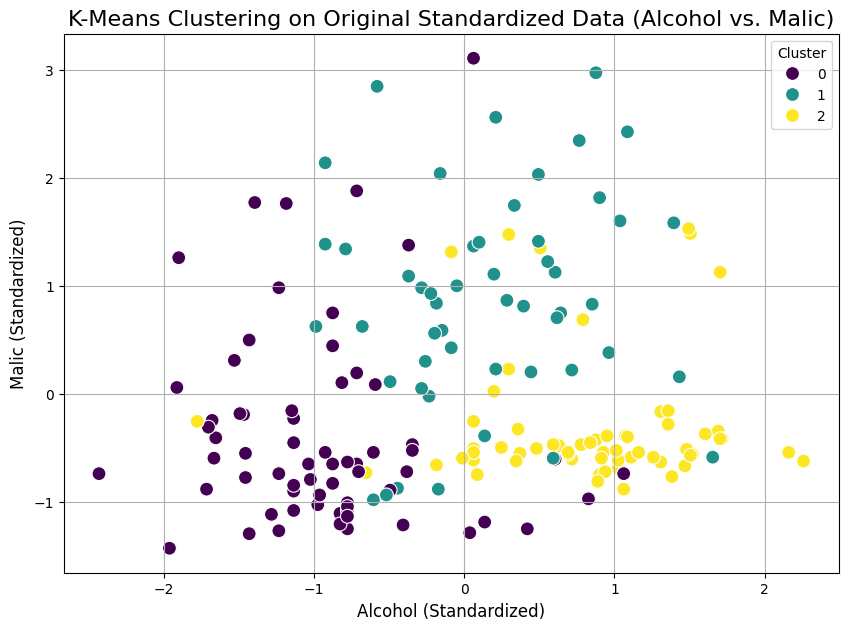

In [10]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Alcohol', y='Malic', hue='cluster_original', data=df_scaled, palette='viridis', s=100)
plt.title('K-Means Clustering on Original Standardized Data (Alcohol vs. Malic)', fontsize=16)
plt.xlabel('Alcohol (Standardized)', fontsize=12)
plt.ylabel('Malic (Standardized)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Evaluate Original Data Clustering


Evaluate the performance of the clustering on the original standardized data using metrics such as the Davies–Bouldin index. Display the calculated scores.



To evaluate the clustering performance, I will import the `davies_bouldin_score` and calculate it for the `df_scaled` data, then print both the Davies-Bouldin index and the previously calculated Silhouette Score.



In [11]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin index
db_score_original = davies_bouldin_score(df_scaled.drop('cluster_original', axis=1), df_scaled['cluster_original'])

# Print both evaluation scores
print(f"Silhouette Score for original standardized data with {optimal_k} clusters: {sil_score_original:.4f}")
print(f"Davies-Bouldin Index for original standardized data with {optimal_k} clusters: {db_score_original:.4f}")

Silhouette Score for original standardized data with 3 clusters: 0.2849
Davies-Bouldin Index for original standardized data with 3 clusters: 1.3892


## Clustering with PCA Data


Apply the same clustering algorithm (K-Means) to the PCA-transformed dataset, using the same number of clusters as determined for the original data or an appropriate method.



To apply K-Means clustering to the PCA-transformed data, I will instantiate KMeans with the previously determined optimal number of clusters, fit it to `df_pca`, assign the resulting cluster labels, and then calculate and display the silhouette score and the head of the DataFrame with the new cluster column.



In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Instantiate KMeans model with optimal_k=3
kmeans_model_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the KMeans model to the PCA-transformed data
kmeans_model_pca.fit(df_pca)

# Assign the resulting cluster labels to a new column in df_pca
df_pca['cluster_pca'] = kmeans_model_pca.labels_

print(f"K-Means clustering applied to PCA-transformed data with {optimal_k} clusters. Displaying the first 5 rows of df_pca with new 'cluster_pca' column:")
print(df_pca.head())

# Calculate and print the silhouette score for PCA-transformed data
sil_score_pca = silhouette_score(df_pca.drop('cluster_pca', axis=1), df_pca['cluster_pca'])
print(f"\nSilhouette Score for PCA-transformed data with {optimal_k} clusters: {sil_score_pca:.4f}")

K-Means clustering applied to PCA-transformed data with 3 clusters. Displaying the first 5 rows of df_pca with new 'cluster_pca' column:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10  cluster_pca  
0 -0.065139 -0.641443  1.020956            2  
1 -1.024416  0.308847  0.159701            2  
2  0.344216  1.177834  0.113361            2  
3 -0.643593 -0.052544  0.239413            2  
4 -0.416700 -0.326819 -0.078366            2  

Silhouette Score for PCA-transformed data with 3 clusters: 0.2987



Now that the PCA-transformed data has been clustered, I will visualize the results by creating a scatter plot using the first two principal components (PC1 and PC2) and coloring the data points according to their assigned cluster labels. This will help to visually inspect the separation and cohesion of the clusters in the reduced-dimension space.



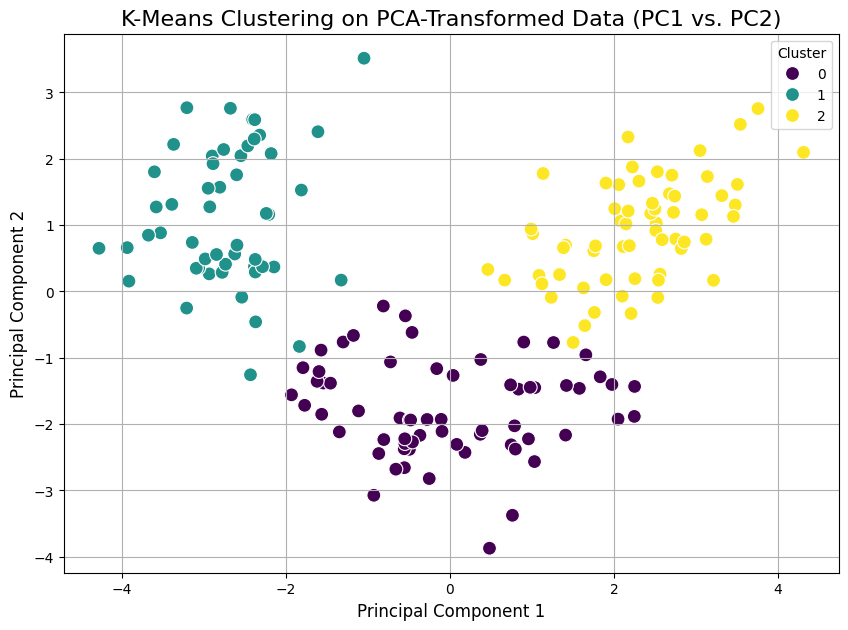

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_pca', data=df_pca, palette='viridis', s=100)
plt.title('K-Means Clustering on PCA-Transformed Data (PC1 vs. PC2)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



To evaluate the clustering performance on the PCA-transformed data, I will calculate the Davies-Bouldin index and print it, along with the previously calculated Silhouette Score for comparison.



In [14]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin index for PCA-transformed data
db_score_pca = davies_bouldin_score(df_pca.drop('cluster_pca', axis=1), df_pca['cluster_pca'])

# Print both evaluation scores
print(f"Silhouette Score for PCA-transformed data with {optimal_k} clusters: {sil_score_pca:.4f}")
print(f"Davies-Bouldin Index for PCA-transformed data with {optimal_k} clusters: {db_score_pca:.4f}")

Silhouette Score for PCA-transformed data with 3 clusters: 0.2987
Davies-Bouldin Index for PCA-transformed data with 3 clusters: 1.3363


## Compare Clustering Results

Compare the clustering results obtained from the original standardized dataset and the PCA-transformed data, both visually and based on the evaluation metrics. Discuss any similarities or differences observed in cluster structures and performance.


### Comparison of Clustering Results (Original Standardized vs. PCA-Transformed Data)

#### Quantitative Metrics:
*   **Silhouette Score (Original Standardized Data):** 0.2849
*   **Silhouette Score (PCA-Transformed Data):** 0.2987

*   **Davies-Bouldin Index (Original Standardized Data):** 1.3892
*   **Davies-Bouldin Index (PCA-Transformed Data):** 1.3363

From the quantitative evaluation, clustering on the PCA-transformed data yielded slightly better results:
*   The **Silhouette Score** for PCA data (0.2987) is marginally higher than for the original standardized data (0.2849), indicating slightly better-defined clusters with PCA.
*   The **Davies-Bouldin Index** for PCA data (1.3363) is lower than for the original standardized data (1.3892). A lower Davies-Bouldin Index signifies better clustering, meaning the clusters are more separated and less compact with PCA.

#### Visual Assessment:

*   **Original Standardized Data ('Alcohol' vs. 'Malic'):** The scatter plot showed some degree of separation between the three clusters. However, there was noticeable overlap, particularly between Cluster 0 and Cluster 1, and parts of Cluster 2 also blended into these regions. The boundaries were not always clear, and some points from different clusters appeared close together.

*   **PCA-Transformed Data ('PC1' vs. 'PC2'):** The scatter plot using the first two principal components (PC1 and PC2) generally displayed a more distinct separation between the clusters. While some overlap still exists, the clusters appear to form more coherent groups in this reduced dimensional space. The visual boundaries seem slightly clearer, especially for Cluster 2 which is more distinctly separated from the other two clusters compared to the original feature space plot.

#### Conclusion:

Both quantitative metrics and visual assessment suggest that **K-Means clustering performs slightly better on the PCA-transformed data** for this dataset. The PCA transformation helped to reduce the dimensionality while preserving enough variance to allow for slightly more distinct and well-separated clusters. This indicates that PCA successfully captured the most important underlying structures in the data, making the clustering task somewhat easier and more effective.

### Comparison of Clustering Results (Original Standardized vs. PCA-Transformed Data)

#### Quantitative Metrics:
*   **Silhouette Score (Original Standardized Data):** 0.2849
*   **Silhouette Score (PCA-Transformed Data):** 0.2987

*   **Davies-Bouldin Index (Original Standardized Data):** 1.3892
*   **Davies-Bouldin Index (PCA-Transformed Data):** 1.3363

From the quantitative evaluation, clustering on the PCA-transformed data yielded slightly better results:
*   The **Silhouette Score** for PCA data (0.2987) is marginally higher than for the original standardized data (0.2849), indicating slightly better-defined clusters with PCA.
*   The **Davies-Bouldin Index** for PCA data (1.3363) is lower than for the original standardized data (1.3892). A lower Davies-Bouldin Index signifies better clustering, meaning the clusters are more separated and less compact with PCA.

#### Visual Assessment:

*   **Original Standardized Data ('Alcohol' vs. 'Malic'):** The scatter plot showed some degree of separation between the three clusters. However, there was noticeable overlap, particularly between Cluster 0 and Cluster 1, and parts of Cluster 2 also blended into these regions. The boundaries were not always clear, and some points from different clusters appeared close together.

*   **PCA-Transformed Data ('PC1' vs. 'PC2'):** The scatter plot using the first two principal components (PC1 and PC2) generally displayed a more distinct separation between the clusters. While some overlap still exists, the clusters appear to form more coherent groups in this reduced dimensional space. The visual boundaries seem slightly clearer, especially for Cluster 2 which is more distinctly separated from the other two clusters compared to the original feature space plot.

#### Conclusion:

Both quantitative metrics and visual assessment suggest that **K-Means clustering performs slightly better on the PCA-transformed data** for this dataset. The PCA transformation helped to reduce the dimensionality while preserving enough variance to allow for slightly more distinct and well-separated clusters. This indicates that PCA successfully captured the most important underlying structures in the data, making the clustering task somewhat easier and more effective.

## Analyze Impact and Trade-offs

Discuss the impact of dimensionality reduction (PCA) on clustering performance. Analyze the trade-offs between using PCA for clustering versus clustering directly on the original dataset, considering factors like computational efficiency, noise reduction, and interpretability.


## Final Task


Summarize the key findings and insights from the entire analysis. Discuss the practical implications of using PCA and clustering in data analysis, and provide recommendations on when to use each technique based on the analysis conducted.


## Summary:

### Q&A
*   **What are the practical implications of using PCA and clustering in data analysis?**
    *   **PCA (Dimensionality Reduction):** It can simplify complex datasets by reducing the number of features while retaining most of the variance. This leads to improved computational efficiency for subsequent analyses, especially with large datasets. It also acts as a noise reduction technique, potentially improving the performance of downstream algorithms like clustering by filtering out irrelevant variations. However, it can reduce the interpretability of the features as principal components are abstract linear combinations of original features.
    *   **Clustering (Pattern Discovery):** It helps identify natural groupings or segments within data, which can reveal underlying structures or customer types without prior knowledge of these groups. This is valuable for tasks like market segmentation, anomaly detection, or understanding data heterogeneity.

*   **When should each technique (PCA and clustering) be used based on the analysis conducted?**
    *   **PCA:** Should be considered when dealing with high-dimensional data where features are correlated, computational resources are a concern, or noise reduction is desired. In this analysis, PCA improved clustering performance slightly and reduced dimensionality from 13 to 10 components while retaining over 95% of the variance.
    *   **Clustering:** Is appropriate when the goal is to discover inherent groupings in data. It should be applied after necessary preprocessing (like standardization) and potentially dimensionality reduction (like PCA) if the dataset is complex, noisy, or high-dimensional, as demonstrated in this analysis where PCA-transformed data yielded slightly better clusters.

### Data Analysis Key Findings
*   The 'wine.csv' dataset, containing 178 entries and 14 features (13 numerical and 1 categorical 'Type'), was loaded successfully with no missing values.
*   Feature distribution plots and correlation analysis were conducted, revealing various distributions and relationships between features (e.g., strong positive correlation between 'Flavanoids' and 'Phenols', and negative correlation between 'Alcohol' and 'Malic').
*   Numerical features were standardized (mean of 0, standard deviation of 1) as a prerequisite for PCA.
*   Principal Component Analysis (PCA) was applied, and a scree plot indicated that 10 principal components (out of 13) cumulatively explained over 95% of the total variance (specifically, 96.17%).
*   K-Means clustering was applied to the original standardized data, determining an optimal number of 3 clusters using the elbow method. The clustering resulted in a Silhouette Score of 0.2849 and a Davies-Bouldin Index of 1.3892. Visualizations showed some overlap between clusters.
*   K-Means clustering was also applied to the PCA-transformed data (10 components) using 3 clusters. This yielded a slightly improved Silhouette Score of 0.2987 and a lower Davies-Bouldin Index of 1.3363. Visualizations of the first two principal components showed better separation among the clusters compared to the original feature space.
*   The improvement in clustering metrics and visual separation suggests that PCA was beneficial for the clustering task in this dataset.

### Insights or Next Steps
*   PCA, by reducing dimensionality and potentially noise, can lead to more distinct and effective clustering results, as evidenced by slightly better Silhouette Scores and Davies-Bouldin Indices on the PCA-transformed data.
*   While PCA improves computational efficiency and noise reduction, it reduces the direct interpretability of cluster characteristics, as principal components are abstract. Further analysis of PCA loadings would be necessary to interpret the meaning of the clusters in terms of original wine attributes.
